C:\Users\Samee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Samee\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


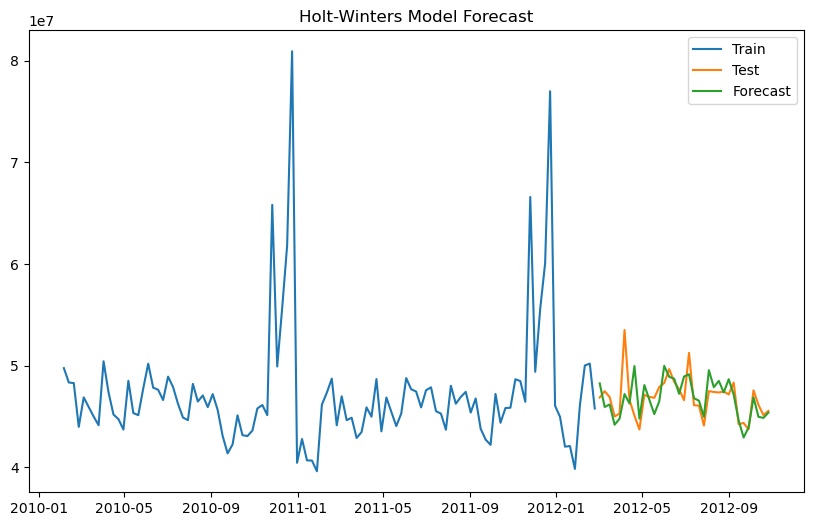

Mean Squared Error: 2996454633366.337
Forecast: 2012-03-02    4.825271e+07
2012-03-09    4.592761e+07
2012-03-16    4.617446e+07
2012-03-23    4.418055e+07
2012-03-30    4.477080e+07
2012-04-06    4.719918e+07
2012-04-13    4.627368e+07
2012-04-20    4.995815e+07
2012-04-27    4.478443e+07
2012-05-04    4.808768e+07
2012-05-11    4.664212e+07
2012-05-18    4.522814e+07
2012-05-25    4.647547e+07
2012-06-01    4.997187e+07
2012-06-08    4.889609e+07
2012-06-15    4.871216e+07
2012-06-22    4.722465e+07
2012-06-29    4.892459e+07
2012-07-06    4.914914e+07
2012-07-13    4.679271e+07
2012-07-20    4.654432e+07
2012-07-27    4.495796e+07
2012-08-03    4.954784e+07
2012-08-10    4.787174e+07
2012-08-17    4.849491e+07
2012-08-24    4.735844e+07
2012-08-31    4.866073e+07
2012-09-07    4.713357e+07
2012-09-14    4.461398e+07
2012-09-21    4.292569e+07
2012-09-28    4.390546e+07
2012-10-05    4.687541e+07
2012-10-12    4.495538e+07
2012-10-19    4.485551e+07
2012-10-26    4.537630e+07
Freq: W

In [17]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


df = pd.read_csv('clean_data.csv')  

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

sales_data = df.groupby('Date')['Weekly_Sales'].sum()


train_data = sales_data[:-35]
test_data = sales_data[-35:]

# Apply Holt-Winters model
model = ExponentialSmoothing(train_data, seasonal_periods=52, trend='add', seasonal='add').fit()

# Forecast
forecast = model.forecast(35)

# Calculate mean squared error
mse = mean_squared_error(test_data, forecast)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Forecast')
plt.title('Holt-Winters Model Forecast')
plt.legend()
plt.show()

print("Mean Squared Error:", mse)
print("Forecast:", forecast)


In [13]:
# Calculate R-squared Score
r2 = r2_score(test_data, forecast)


print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 808851332652.3331
R-squared Score: 0.6356577435697491


In [34]:

r2 = 0.6356577435697491  

# Converting R-squared score to a percentage
r2_percentage = r2 * 100

# Printing the accuracy as a percentage
print("Accuracy: {:.2f}%".format(r2_percentage))


Accuracy: 63.57%
